In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

In [2]:
# --- Parameters ---
num_fils = 606
num_segs = 20
num_steps = 500
sphere_radius = 197.6 

# --- File Paths ---
# Make sure to use the correct simulation data path
base_path = f'../data/test_packing/20250915/ciliate_606fil_18000blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift'
phase_file_path = f'{base_path}_true_states.dat'

# --- Load Data ---
phase_data = np.loadtxt(phase_file_path)

# --- Process Data ---
time = phase_data[:, 0] / num_steps
num_steps = len(time)

# Extract phases: (time, num_fils)
phases = np.mod(phase_data[:, 2:num_fils+2], 2*np.pi)

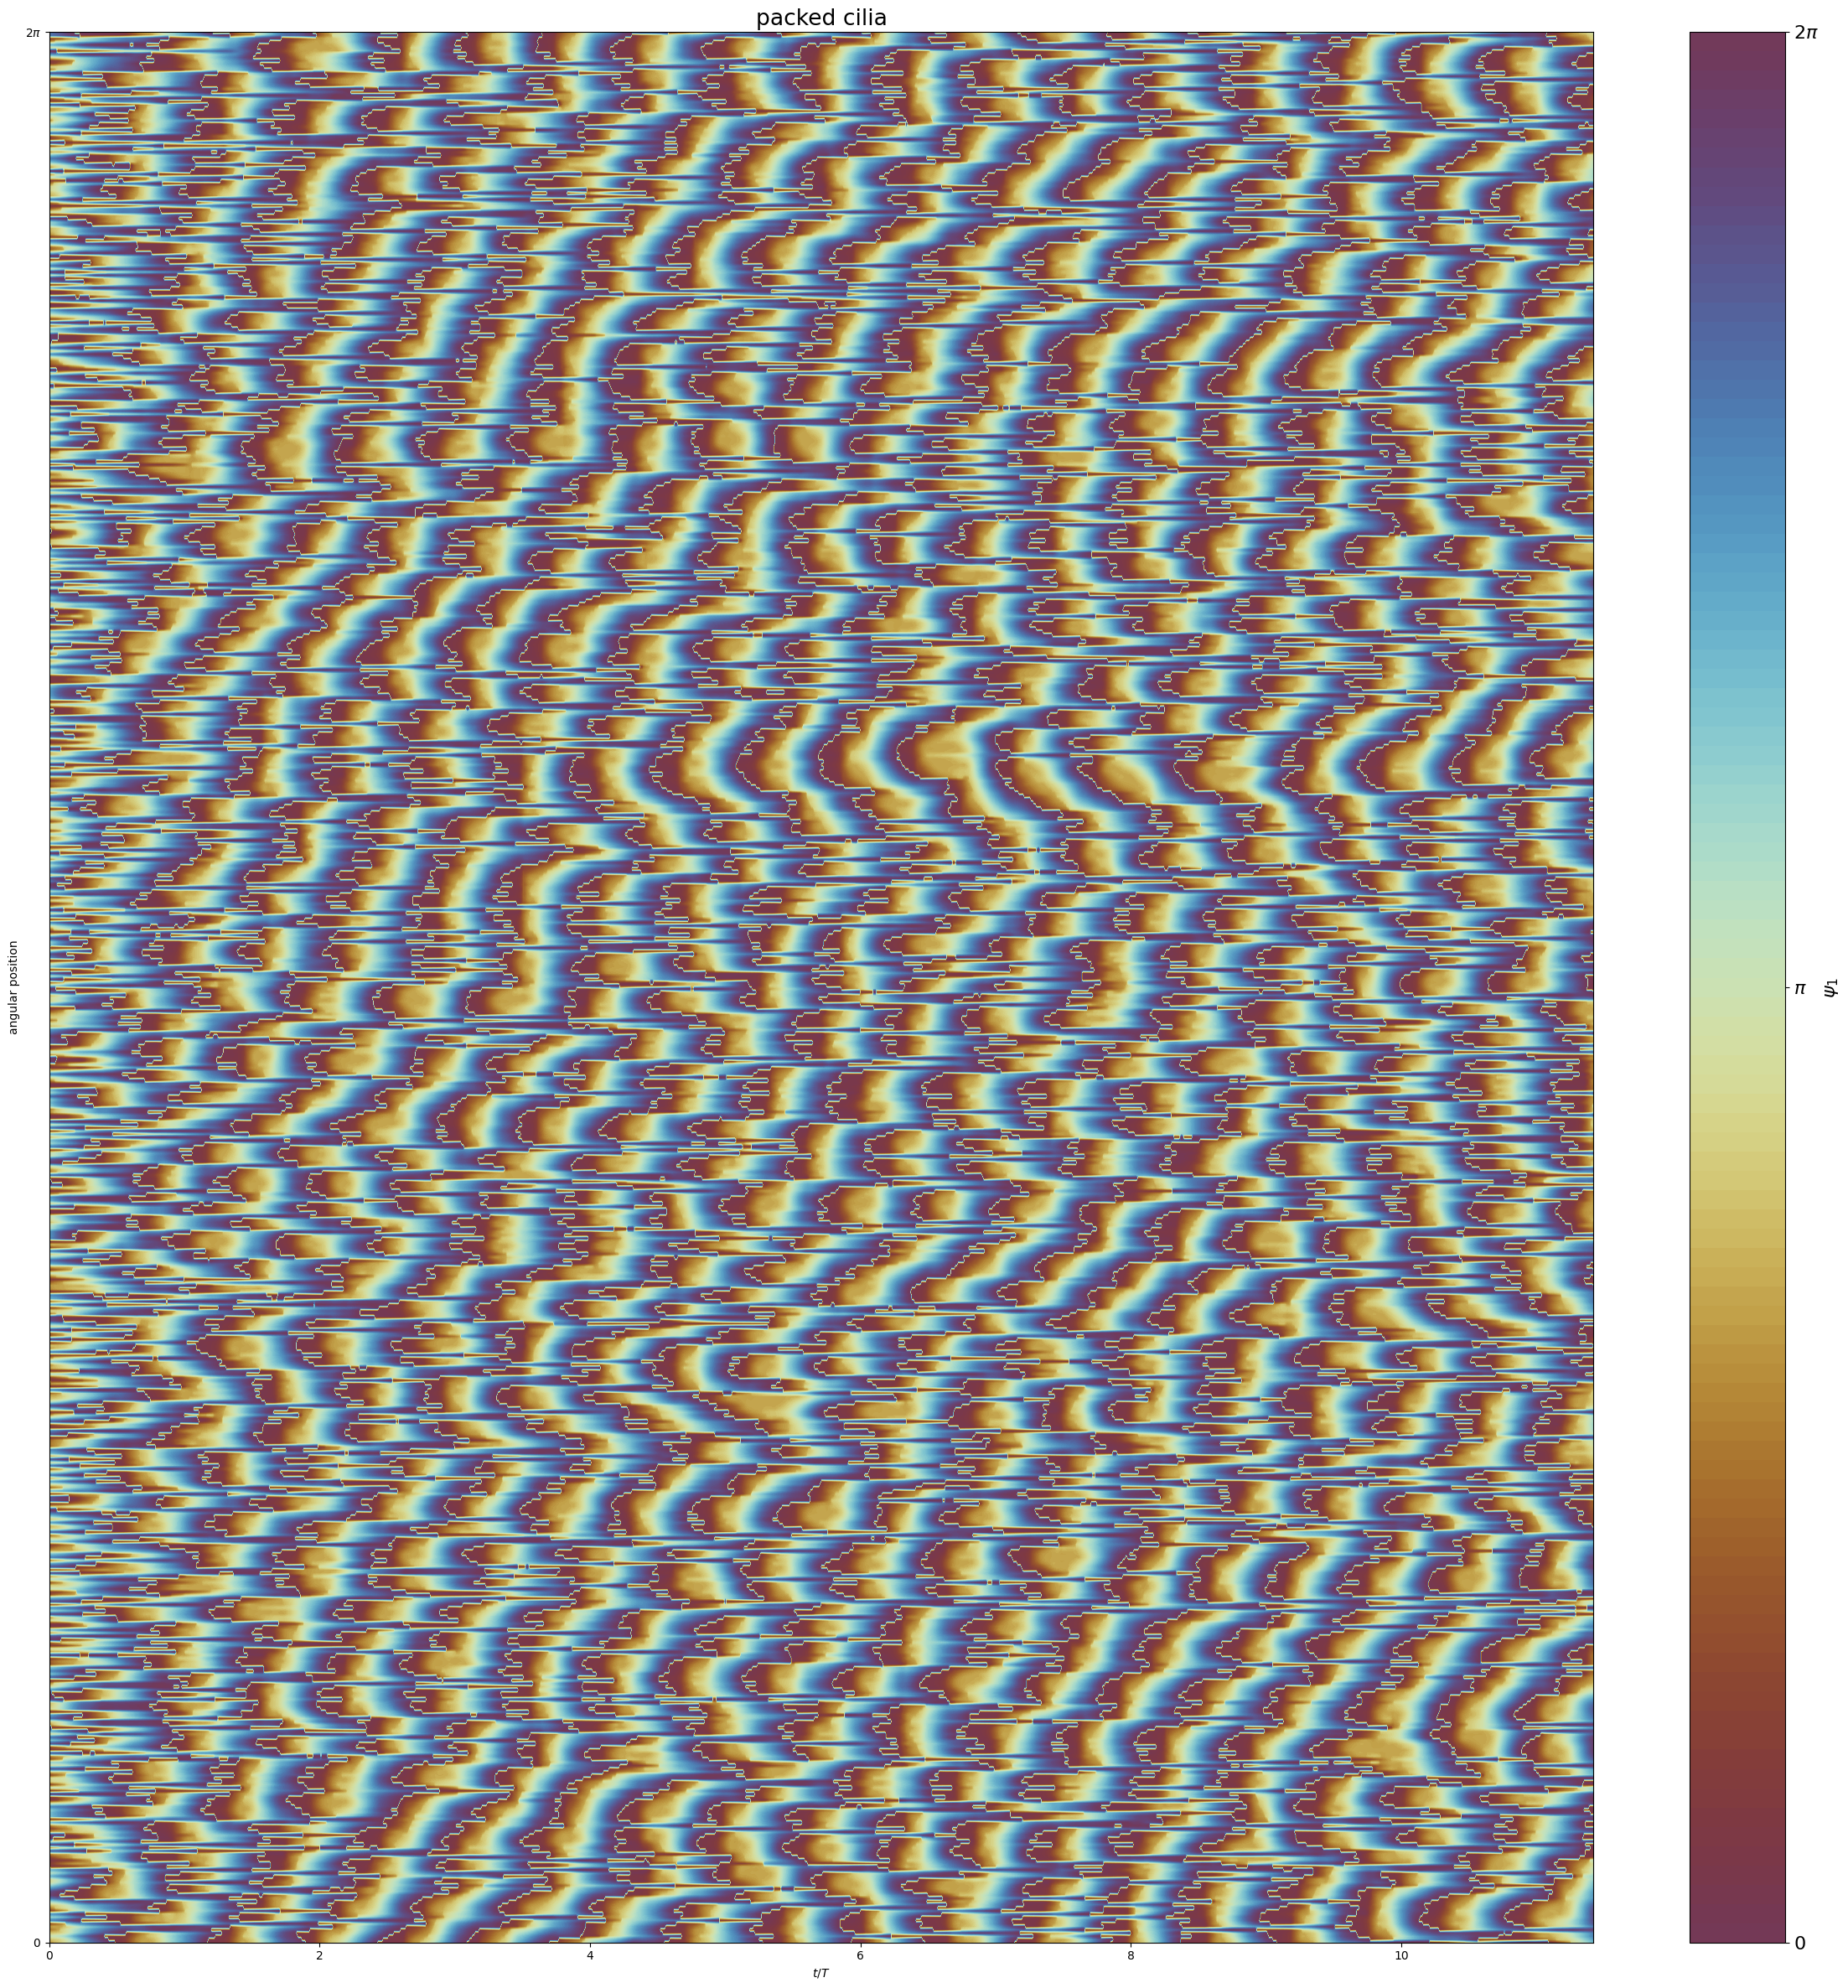

In [3]:
# --- Create Kymograph ---
fig, axes = plt.subplots(1, 1, figsize=(24, 24), squeeze=False)
plt.rcParams.update({"font.size": 16})

# --- Kymograph ---
ax = axes[0, 0]
position = np.linspace(0, 2*np.pi, num_fils)
xx, yy = np.meshgrid(time, position)
im = ax.contourf(xx, yy, phases.T, cmap=cmc.romaO, levels=np.linspace(0, 2*np.pi, 100))

cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'$\psi_1$')
cbar.set_ticks([0, np.pi, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$\pi$', r'$2\pi$'])

ax.set_xlabel(r'$t/T$')
ax.set_ylabel('angular position')
ax.set_title('packed cilia')
ax.set_yticks([0, 2*np.pi])
ax.set_yticklabels([r'$0$', r'$2\pi$'])

plt.tight_layout()
plt.show()
plt.rcParams.update(plt.rcParamsDefault)

In [4]:
fil_positions_path = f'{base_path}_fil_references.dat'
fil_positions = np.loadtxt(fil_positions_path).reshape(num_fils, 3)

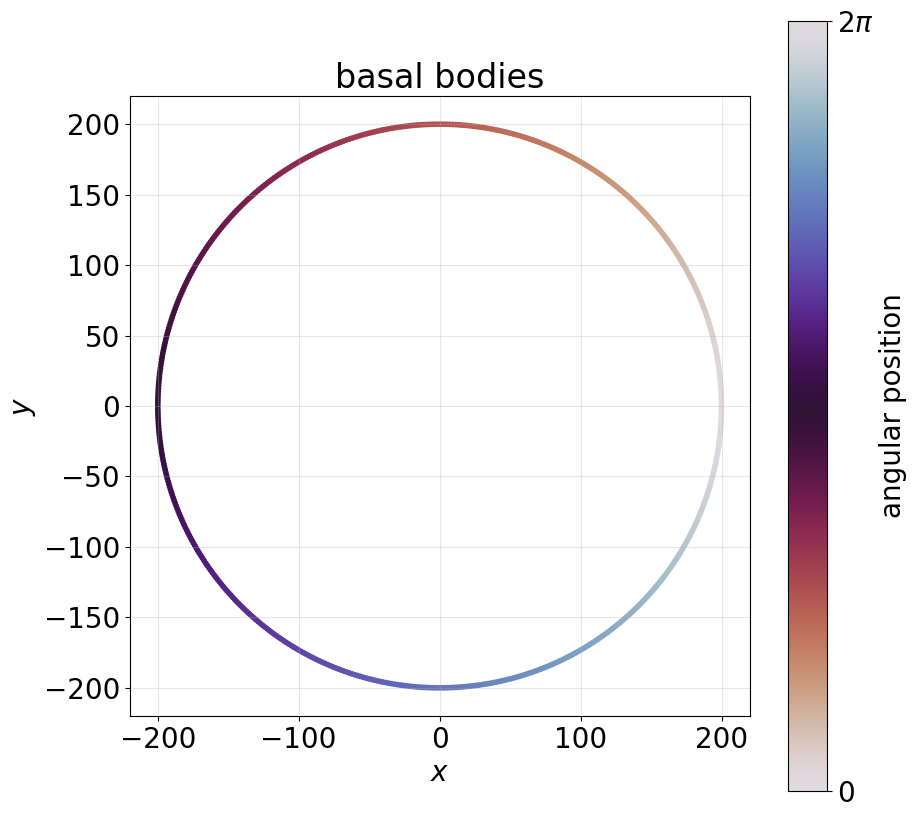

In [5]:
plt.rcParams.update({
    # "text.usetex": True,
    # "font.family": "serif",
    "font.size": 20
})

# --- Plot Cilia Positions ---
fig_pos, ax_pos = plt.subplots(figsize=(10, 10))

# Get the base positions of all cilia
x_coords = fil_positions[:, 0]
y_coords = fil_positions[:, 1]

# Create an array of angular positions for coloring
angular_positions = np.linspace(0, 2 * np.pi * (num_fils - 1) / num_fils, num_fils)

# Create the scatter plot using a cyclical colormap
scatter = ax_pos.scatter(x_coords, y_coords, c=angular_positions, cmap="twilight_r", s=10, vmin=0, vmax=2*np.pi)

# Add a colorbar
cbar_pos = fig_pos.colorbar(scatter, ax=ax_pos)
cbar_pos.set_label('angular position')
cbar_pos.set_ticks([0, 2*np.pi])
cbar_pos.set_ticklabels([r'$0$', r'$2\pi$'])

# Set labels and title
ax_pos.set_xlabel(r'$x$')
ax_pos.set_ylabel(r'$y$')
ax_pos.set_title('basal bodies')
ax_pos.set_aspect('equal', adjustable='box')
ax_pos.grid(True, alpha=0.3)

plt.show()

# Reset matplotlib defaults
plt.rcParams.update(plt.rcParamsDefault)